In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from glob import glob
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
adidas_train = glob(r'F:\DataScience\Educational\Computer Vision\Adidas vs Nike\data\train\adidas\*.jpg')
nike_train = glob(r'F:\DataScience\Educational\Computer Vision\Adidas vs Nike\data\train\nike\*.jpg')
adidas_val = glob(r'F:\DataScience\Educational\Computer Vision\Adidas vs Nike\data\validation\adidas\*.jpg')
nike_val = glob(r'F:\DataScience\Educational\Computer Vision\Adidas vs Nike\data\validation\nike\*.jpg')
adidas_test = glob(r'F:\DataScience\Educational\Computer Vision\Adidas vs Nike\data\test\adidas\*.jpg')
nike_test = glob(r'F:\DataScience\Educational\Computer Vision\Adidas vs Nike\data\test\nike\*.jpg')


In [3]:
len(adidas_train), len(nike_train), len(adidas_val), len(nike_val), len(adidas_test), len(nike_test)

(230, 230, 27, 28, 30, 30)

## Let's see the examples of images

[8, 24, 1]


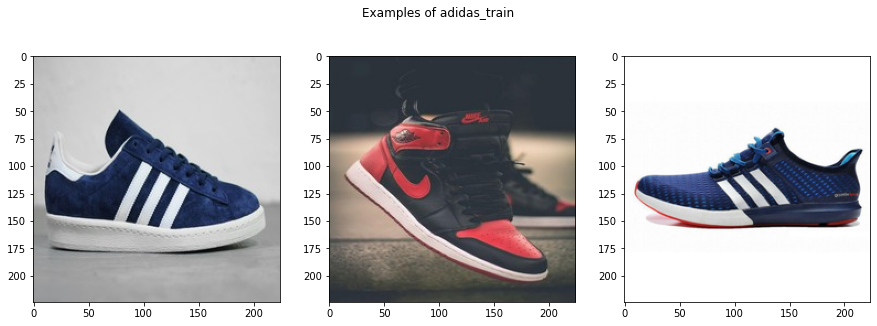

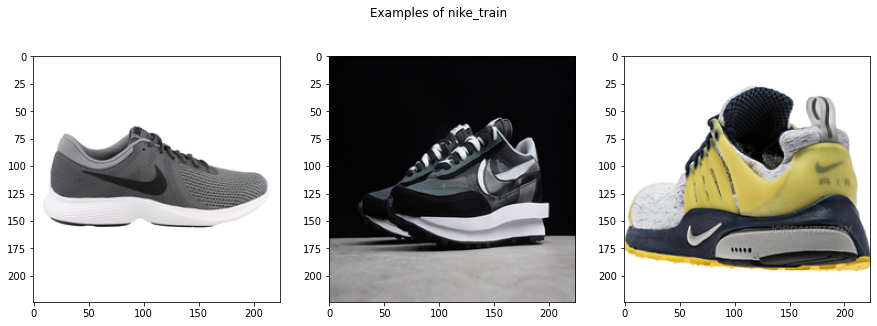

In [4]:
numbers = list(np.random.randint(27, size = 3))
print(numbers)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, number in enumerate(numbers):
    curr_img = plt.imread(adidas_train[number])
    axs[i].imshow(curr_img)
    plt.suptitle('Examples of adidas_train')
    
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, number in enumerate(numbers):
    curr_img = plt.imread(nike_train[number])
    axs[i].imshow(curr_img)
    plt.suptitle('Examples of nike_train')


## Different images have different shapes

## Let's preprocess our data, rescale channels to [0,1] and reshape it it 150x150. The size choice is random

In [6]:
datagen = ImageDataGenerator(rescale=1./255)


In [7]:
train_generator = datagen.flow_from_directory(r'F:/DataScience/Educational/Computer Vision/Adidas vs Nike/data/train/', target_size=(150, 150), class_mode='binary', batch_size = 20)
val_generator = datagen.flow_from_directory(r'F:/DataScience/Educational/Computer Vision/Adidas vs Nike/data/validation/', target_size=(150, 150), class_mode='binary', batch_size = 20)
test_generator= datagen.flow_from_directory(r'F:/DataScience/Educational/Computer Vision/Adidas vs Nike/data/test/', target_size=(150, 150), class_mode='binary')


Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
 metrics='sparse_categorical_accuracy')



In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
history = model.fit(train_generator, epochs=30, batch_size=64, validation_data = val_generator, verbose=0)

f:\datascience\educational\env\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


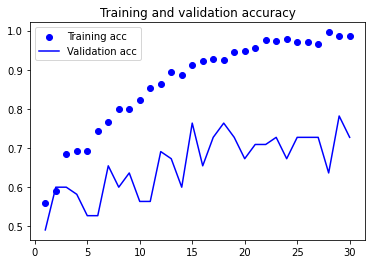

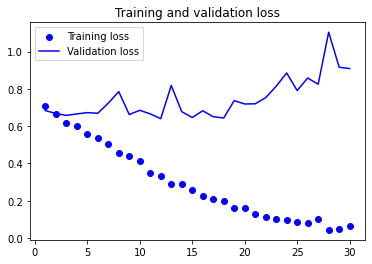

In [14]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.scatter(epochs, acc, color ='blue', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.scatter(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Due to small amount of images the overfitting problem is observed. The common way to solve this problem is to use data augmentation:

In [19]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range = 25, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(r'F:/DataScience/Educational/Computer Vision/Adidas vs Nike/data/train/', target_size=(150, 150), class_mode='binary', batch_size = 64, shuffle=True, subset='training')
val_generator = datagen.flow_from_directory(r'F:/DataScience/Educational/Computer Vision/Adidas vs Nike/data/validation/', target_size=(150, 150), class_mode='binary', batch_size = 64, shuffle=True)
test_generator= test_datagen.flow_from_directory(r'F:/DataScience/Educational/Computer Vision/Adidas vs Nike/data/test/', target_size=(150, 150), class_mode='binary', shuffle=True)


Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
 metrics='sparse_categorical_accuracy')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [21]:
%%time
history = model.fit(train_generator, epochs = 100, validation_data = val_generator, verbose = 0)

CPU times: total: 10min 21s
Wall time: 9min 37s


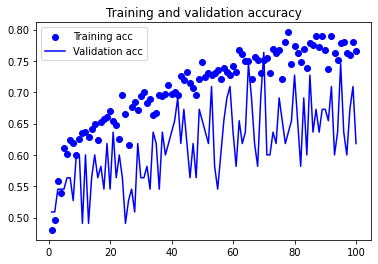

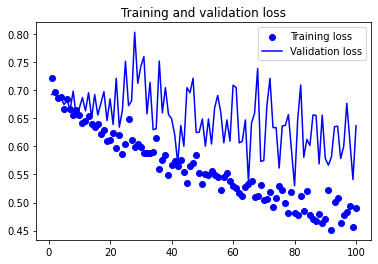

In [22]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.scatter(epochs, acc, color ='blue', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.scatter(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
history_aug = history

## Let's add batch normalization to our NN

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
 metrics='sparse_categorical_accuracy')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [25]:
history_batch = model.fit(train_generator, epochs = 100, validation_data = val_generator, verbose = 0)

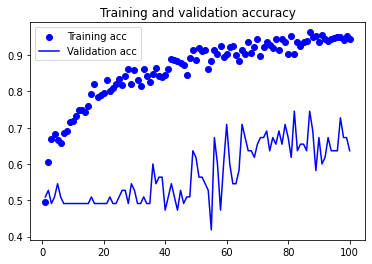

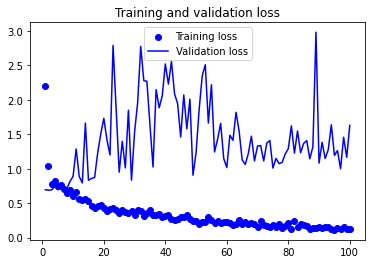

In [26]:
acc = history_batch.history['sparse_categorical_accuracy']
val_acc = history_batch.history['val_sparse_categorical_accuracy']
loss = history_batch.history['loss']
val_loss = history_batch.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.scatter(epochs, acc, color ='blue', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.scatter(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

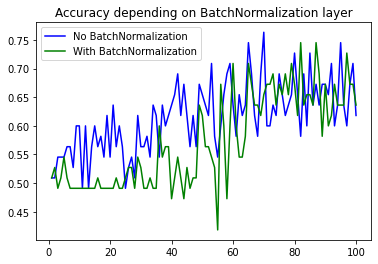

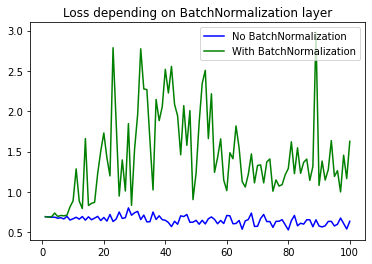

In [27]:
acc_aug = history_aug.history['val_sparse_categorical_accuracy']
loss_aug = history_aug.history['val_loss']
acc_batch = history_batch.history['val_sparse_categorical_accuracy']
loss_batch = history_batch.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc_aug, color ='blue', label='No BatchNormalization')
plt.plot(epochs, acc_batch, color ='green', label='With BatchNormalization')
plt.title('Accuracy depending on BatchNormalization layer')
plt.legend()
plt.figure()
plt.plot(epochs, loss_aug, color ='blue', label='No BatchNormalization')
plt.plot(epochs, loss_batch, color='green', label='With BatchNormalization')
plt.title('Loss depending on BatchNormalization layer')
plt.legend()



In [28]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'The total accuracy is {test_acc}')

2/2 [==============================] - 1s 142ms/step - loss: 1.0153 - sparse_categorical_accuracy: 0.6500
The total accuracy is 0.6499999761581421
